### Carregado funções e bibliotecas e organizando a base de dados que iremos usar. ###

In [180]:
def regressaoLinear(x,y):
    xizes = np.zeros([2,2])
    ypslon = np.zeros(2)
    
    xizes[0][0] = len(x)
    xizes[0][1] = xizes[1][0] = x.sum()
    xizes[1][1] = (x*x).sum()
    
    ypslon[0] = y.sum()
    ypslon[1] = (x*y).sum()
    
    
    return np.linalg.solve(xizes,ypslon)

def regressaoLinearMultipla(x,y): #x é uma matriz ao invés de vetor
    xizes = np.vstack((np.ones(len(x)),x))
    ypslon = xizes.dot(y)
    xizes = xizes.dot(xizes.T)
    return np.linalg.solve(xizes, ypslon)

def resolveLinVet(b,x):
    return b[0] + (b[1:]*x).sum(axis=0)

def resolveLin(b,x):
    return b[0] + b[1:]*x

def distanciaquad(y,yp):
    return ((y-yp)**2).sum()
    
def r2(y,yp):
    return 1- distanciaquad(y,yp)/((y-y.mean())**2).sum()

In [181]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
base = pd.read_csv("MICRODADOS_ENEM_ESCOLA.csv",delimiter=';',encoding="iso-8859-1")

In [183]:
base = base[(base.SG_UF_ESCOLA=="AM")].sort_values(['NU_ANO'],ascending = True)
base = base[(base.PC_FORMACAO_DOCENTE.notnull()) &(base.NU_TAXA_PERMANENCIA.notnull()) & (base.NU_TAXA_PARTICIPACAO.notnull())]
base = base[(base.NU_MEDIA_RED).notnull()]
base = base.drop(['NU_MEDIA_OBJ', 'NU_MEDIA_TOT','CO_ESCOLA_EDUCACENSO','CO_MUNICIPIO_ESCOLA','INSE','CO_UF_ESCOLA', 'NO_ESCOLA_EDUCACENSO'],axis = 1)
base =  base.reset_index()

### Analisando correlação entre variáveis. ###

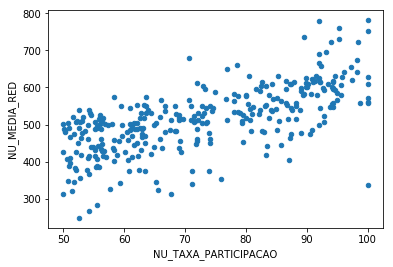

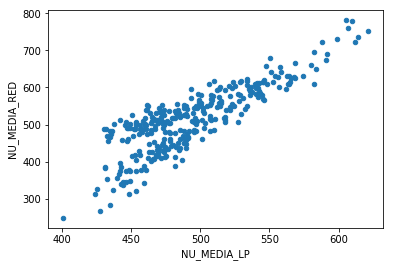

In [184]:
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')

## A média em Linguagem tem uma correlação mais forte do que a Taxa de Participação, é por isso que vamos usa-lá para regressão ###

0.7177843765392018
b = [-385.25533251    1.82290022]


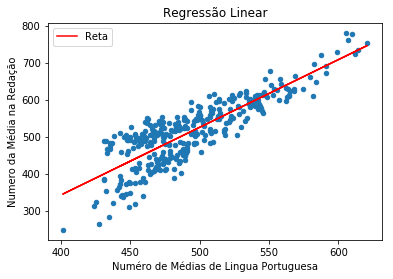

In [185]:
x = base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoLinear(x,y)
yp = resolveLin(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Reta")
plt.title("Regressão Linear")
plt.legend()
plt.xlabel("Numéro de Médias de Lingua Portuguesa")
plt.ylabel("Numero da Média na Redação")
plt.show()

b = [-385.25533251    1.82290022]


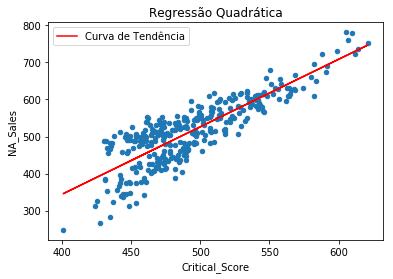

In [190]:
x = base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')

#Aqui voce pode escolher transpor ou nao, o importante eh ficar de acordo com seu codigo acima
b = regressaoLinearMultipla(x,y)
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Curva de Tendência")
plt.title("Regressão Quadrática")
plt.legend()
plt.xlabel("Critical_Score")
plt.ylabel("NA_Sales")
plt.show()